In [420]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPClassifier

In [421]:
load_path = 'D:\EECE499\Features\\'
#load_path = '..\..\\'

In [422]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [423]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

# Arousal

In [424]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [426]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [427]:
classifier = MLPClassifier(hidden_layer_sizes=(2, 50, 2), random_state=0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 50, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [428]:
y_pred_train = classifier.predict(X_train)

In [429]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [430]:
confusion_mtrx

array([[  0,   0,   0,   0,   6,   0,   0],
       [  0,   0,   0,   0,  28,   9,   0],
       [  0,   0,   0,   0,  44,  23,   0],
       [  0,   0,   0,   0,  71,  37,   0],
       [  0,   0,   0,   0, 157,  54,   0],
       [  0,   0,   0,   0,  67,  90,   0],
       [  0,   0,   0,   0,  26,  26,   0]], dtype=int64)

In [431]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [432]:
print(accuracy, mae, rmse)

0.3871473354231975 1.0109717868338557 2.1081504702194356


In [433]:
y_pred = classifier.predict(X_test)

In [434]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [435]:
confusion_mtrx

array([[ 0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  8,  3,  0],
       [ 0,  0,  0,  0, 12,  8,  0],
       [ 0,  0,  0,  0, 32, 14,  0],
       [ 0,  0,  0,  0, 52, 22,  0],
       [ 0,  0,  0,  0, 25, 19,  0],
       [ 0,  0,  0,  0, 10,  6,  0]], dtype=int64)

In [436]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [437]:
print(accuracy, mae, rmse)

0.3333333333333333 1.0610328638497653 2.1690140845070425


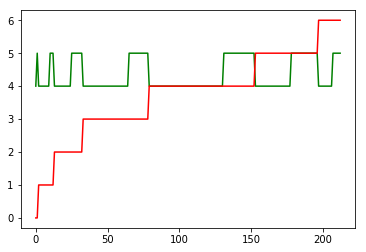

In [438]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

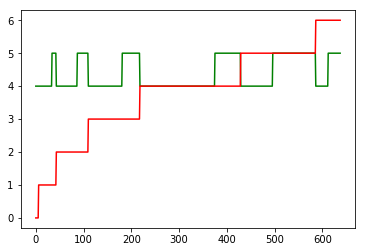

In [439]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [440]:
param_space = {
    'hidden_layer_sizes': [(5,), (5, 2, 5), (2, 5, 2), (2, 50, 2), (2, 100, 2), (10, 50, 10)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [441]:
classifier = MLPClassifier(random_state=42)

grid_search = GridSearchCV(classifier, param_grid=param_space, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error',\
                           verbose=42)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.0685358255451713, total=   0.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.1198738170347002, total=   0.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.0685358255451713, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.1198738170347002, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.0498442367601246, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.1009463722397477, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.0498442367601246, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.1009463722397477, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.3489096573208723, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.6s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.4195583596214512, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.3489096573208723, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.4195583596214512, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.2s remaining:    0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.0778816199376946, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.0378548895899053, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.0778816199376946, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    3.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.0378548895899053, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.9968454258675079, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.9968454258675079, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.2118380062305296, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    4.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.160883280757098, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    5.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.2118380062305296, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.6s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.160883280757098, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.0778816199376946, total=   0.0s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    5.9s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.1230283911671923, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.0778816199376946, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    6.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.1230283911671923, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    6.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.0654205607476634, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.0914826498422714, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    6.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.0654205607476634, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    7.1s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.0914826498422714, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.3489096573208723, total=   0.1s


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    7.2s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.1829652996845426, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    7.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.3489096573208723, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    7.6s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.1829652996845426, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    7.8s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    8.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.0809968847352025, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    8.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.0315457413249212, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    8.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.0809968847352025, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    8.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.0315457413249212, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    9.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.9968454258675079, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.9968454258675079, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.205607476635514, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.1577287066246056, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.205607476635514, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.1577287066246056, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.02803738317757, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.0094637223974763, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.02803738317757, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.0094637223974763, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.0031152647975077, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.9968454258675079, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.0031152647975077, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.9968454258675079, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.1713395638629283, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.1167192429022081, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.1713395638629283, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.1167192429022081, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.0031152647975077, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.9968454258675079, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.0031152647975077, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.9968454258675079, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.9968454258675079, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.9968454258675079, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.0567823343848581, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.0567823343848581, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.0311526479750779, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.0094637223974763, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.0311526479750779, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.0094637223974763, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.0031152647975077, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.9968454258675079, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.0031152647975077, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.9968454258675079, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.0996884735202492, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.0599369085173502, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.0996884735202492, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.0599369085173502, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.9968454258675079, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.0031152647975077, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.9968454258675079, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.9968454258675079, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.9968454258675079, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.025236593059937, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.0031152647975077, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.025236593059937, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.2149532710280373, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.1324921135646688, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.2149532710280373, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.1324921135646688, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.1308411214953271, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.1419558359621451, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.1308411214953271, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.1419558359621451, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.3052959501557633, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.3280757097791798, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.3052959501557633, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.3280757097791798, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.0560747663551402, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.0220820189274449, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.0560747663551402, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.0220820189274449, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.0560747663551402, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.0315457413249212, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.0560747663551402, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.0315457413249212, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.2990654205607477, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.2555205047318612, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.2990654205607477, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.2555205047318612, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.2118380062305296, total=   0.0s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.1261829652996846, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.2118380062305296, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.1261829652996846, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.1308411214953271, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.1324921135646688, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.1308411214953271, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.1324921135646688, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.3115264797507789, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.3217665615141956, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.3115264797507789, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.3217665615141956, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.0560747663551402, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.025236593059937, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.0560747663551402, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.025236593059937, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.0560747663551402, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.0315457413249212, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.0560747663551402, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.0315457413249212, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.2741433021806854, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.2460567823343849, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.2741433021806854, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   33.8s finished


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.2460567823343849, total=   0.2s


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(5,), (5, 2, 5), (2, 5, 2), (2, 50, 2), (2, 100, 2), (10, 50, 10)], 'activation': ['relu', 'logistic', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=42)

In [442]:
y_pred_train = grid_search.predict(X_train)

In [443]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [444]:
confusion_mtrx

array([[  0,   0,   0,   0,   3,   1,   2],
       [  0,   0,   0,   0,  27,   2,   8],
       [  0,   0,   0,   0,  65,   1,   1],
       [  0,   0,   0,   0, 107,   0,   1],
       [  0,   0,   0,   0, 207,   1,   3],
       [  0,   0,   0,   0, 147,   1,   9],
       [  0,   0,   0,   0,  40,   2,  10]], dtype=int64)

In [445]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [446]:
print(accuracy, mae, rmse)

0.34169278996865204 1.0188087774294672 2.1191222570532915


In [447]:
y_pred = grid_search.predict(X_test)

In [448]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [449]:
confusion_mtrx

array([[ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  2],
       [ 0,  0,  0,  0, 45,  0,  1],
       [ 0,  0,  0,  0, 71,  2,  1],
       [ 0,  0,  0,  0, 43,  0,  1],
       [ 0,  0,  0,  0, 13,  0,  3]], dtype=int64)

In [450]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [451]:
print(accuracy, mae, rmse)

0.3474178403755869 0.971830985915493 1.835680751173709


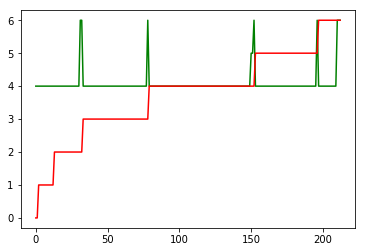

In [452]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

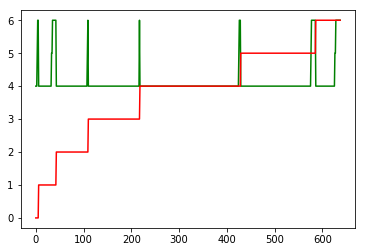

In [453]:
y_pred = grid_search.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [454]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (2, 100, 2),
 'learning_rate': 'constant',
 'solver': 'adam'}

# Engaging

In [455]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -4].values

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [457]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [458]:
classifier = MLPClassifier(hidden_layer_sizes=(2, 50, 2), random_state=0)
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 50, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [459]:
y_pred_train = classifier.predict(X_train)

In [460]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [461]:
confusion_mtrx

array([[  0,   2,  25,   0,   3,   5,   0],
       [  0,   8,  56,   0,  22,   5,   0],
       [  0,   4, 107,   0,  15,   8,   0],
       [  0,   6,  70,   0,   4,  20,   0],
       [  0,   6,  55,   0,  32,   8,   0],
       [  0,   1,  94,   0,  10,  16,   0],
       [  0,   2,  45,   0,   4,   5,   0]], dtype=int64)

In [462]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [463]:
print(accuracy, mae, rmse)

0.2554858934169279 1.64576802507837 4.495297805642633


In [464]:
y_pred = classifier.predict(X_test)

In [465]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [466]:
confusion_mtrx

array([[ 0,  0, 14,  0,  4,  3,  0],
       [ 0,  2, 13,  0,  3,  3,  0],
       [ 0,  0, 34,  0,  7,  2,  0],
       [ 0,  1, 27,  0,  2,  5,  0],
       [ 0,  1, 24,  0,  5,  4,  0],
       [ 0,  2, 31,  0,  1,  4,  0],
       [ 0,  3, 13,  0,  4,  1,  0]], dtype=int64)

In [467]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [468]:
print(accuracy, mae, rmse)

0.2112676056338028 1.8169014084507042 5.178403755868545


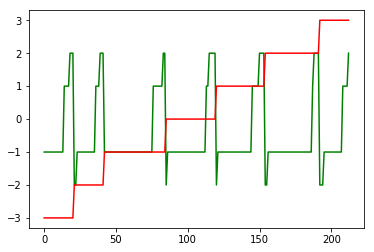

In [469]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

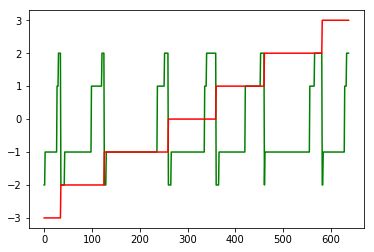

In [470]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [471]:
param_space = {
    'hidden_layer_sizes': [(5,), (5, 2, 5), (2, 5, 2), (2, 50, 2), (2, 100, 2), (10, 50, 10)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [472]:
classifier = MLPClassifier(random_state=42)

grid_search = GridSearchCV(classifier, param_grid=param_space, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error',\
                           verbose=42)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.6542056074766356, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.6719242902208202, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.6542056074766356, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s



[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.6719242902208202, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.67601246105919, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.8517350157728707, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.67601246105919, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.8517350157728707, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.64797507788162, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.586750788643533, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.3s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.64797507788162, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.586750788643533, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.9595015576323989, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.864353312302839, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.9595015576323989, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    3.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.864353312302839, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.8130841121495327, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.8548895899053628, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.8130841121495327, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.8548895899053628, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.9626168224299065, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    5.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.77602523659306, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    5.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.9626168224299065, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.8s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.77602523659306, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.6978193146417446, total=   0.0s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    6.1s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.6876971608832807, total=   0.0s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.6978193146417446, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    6.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.6876971608832807, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    6.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.6853582554517135, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.8675078864353312, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    7.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.6853582554517135, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    7.3s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.8675078864353312, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    7.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.64797507788162, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    7.7s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.6277602523659307, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    7.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.64797507788162, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    8.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.6277602523659307, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    8.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.9532710280373833, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    8.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.8296529968454258, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    8.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.9532710280373833, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    9.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.8296529968454258, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    9.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.8161993769470406, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.864353312302839, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.8161993769470406, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.864353312302839, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.8691588785046729, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.832807570977918, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.8691588785046729, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.832807570977918, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.67601246105919, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.7697160883280758, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.67601246105919, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.7697160883280758, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.64797507788162, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.6435331230283912, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.64797507788162, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.64797507788162, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.8958990536277602, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.64797507788162, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.8958990536277602, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.64797507788162, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.6435331230283912, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.64797507788162, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.6435331230283912, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.64797507788162, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.6435331230283912, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.64797507788162, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.7697160883280758, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.67601246105919, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.7697160883280758, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.64797507788162, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.6435331230283912, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.64797507788162, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.64797507788162, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.6435331230283912, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.64797507788162, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.6435331230283912, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.64797507788162, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.6435331230283912, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.64797507788162, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.7350157728706626, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.6573208722741433, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.7350157728706626, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.9158878504672898, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.9526813880126184, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.9158878504672898, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.9526813880126184, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.604361370716511, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.7634069400630914, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.604361370716511, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.7634069400630914, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.750778816199377, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.7949526813880126, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.750778816199377, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.7949526813880126, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.8224299065420562, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.779179810725552, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.8224299065420562, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.779179810725552, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.8722741433021808, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.8170347003154574, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.8722741433021808, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.8170347003154574, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.6635514018691588, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.7350157728706626, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.6635514018691588, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.7350157728706626, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.912772585669782, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.9621451104100947, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.912772585669782, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.9621451104100947, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.6168224299065421, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.7602523659305993, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.6168224299065421, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.7602523659305993, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.7414330218068537, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.8138801261829653, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.7414330218068537, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.8138801261829653, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.8317757009345794, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.7634069400630914, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.8317757009345794, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.7634069400630914, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.841121495327103, total=   0.3s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.832807570977918, total=   0.3s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.841121495327103, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   32.1s finished


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.832807570977918, total=   0.3s


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(5,), (5, 2, 5), (2, 5, 2), (2, 50, 2), (2, 100, 2), (10, 50, 10)], 'activation': ['relu', 'logistic', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=42)

In [473]:
y_pred_train = grid_search.predict(X_train)

In [474]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [475]:
confusion_mtrx

array([[  0,   0,  29,   6,   0,   0,   0],
       [  0,   0,  86,   4,   0,   1,   0],
       [  0,   0, 133,   1,   0,   0,   0],
       [  0,   0,  84,  15,   0,   1,   0],
       [  0,   0,  82,  16,   0,   3,   0],
       [  0,   0, 110,   6,   0,   5,   0],
       [  0,   0,  47,   7,   0,   2,   0]], dtype=int64)

In [476]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [477]:
print(accuracy, mae, rmse)

0.23981191222570533 1.5626959247648904 4.004702194357367


In [478]:
y_pred = grid_search.predict(X_test)

In [479]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [480]:
confusion_mtrx

array([[ 0,  0, 20,  1,  0,  0,  0],
       [ 0,  0, 18,  2,  0,  1,  0],
       [ 0,  0, 41,  2,  0,  0,  0],
       [ 0,  0, 34,  1,  0,  0,  0],
       [ 0,  0, 30,  2,  0,  2,  0],
       [ 0,  0, 30,  6,  0,  2,  0],
       [ 0,  0, 17,  4,  0,  0,  0]], dtype=int64)

In [481]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [482]:
print(accuracy, mae, rmse)

0.20657276995305165 1.647887323943662 4.192488262910798


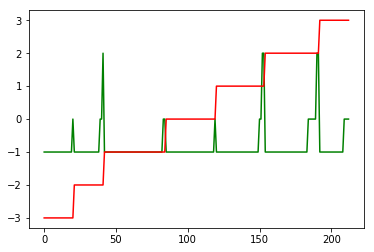

In [483]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

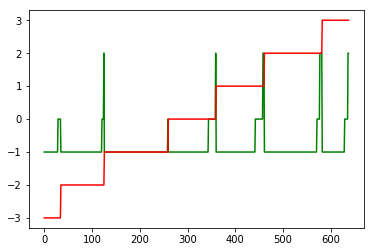

In [484]:
y_pred = grid_search.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [485]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (2, 5, 2),
 'learning_rate': 'constant',
 'solver': 'adam'}

# Familiarity

In [486]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -3].values

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [488]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [489]:
classifier = MLPClassifier(hidden_layer_sizes=(2, 50, 2), random_state=0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 50, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [490]:
y_pred_train = classifier.predict(X_train)

In [491]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [492]:
confusion_mtrx

array([[  0,   0,   0,   0,   2,   0],
       [  0,   0,   0,   0,  15,   0],
       [  0,   0,   0,   0,  69,   0],
       [  0,   0,   0,   0, 169,   0],
       [  0,   0,   0,   0, 259,   0],
       [  0,   0,   0,   0, 124,   0]], dtype=int64)

In [493]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [494]:
print(accuracy, mae, rmse)

0.4059561128526646 0.7586206896551724 1.1536050156739812


In [495]:
y_pred = classifier.predict(X_test)

In [496]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [497]:
confusion_mtrx

array([[ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0, 69,  0],
       [ 0,  0,  0,  0, 86,  0],
       [ 0,  0,  0,  0, 40,  0]], dtype=int64)

In [498]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [499]:
print(accuracy, mae, rmse)

0.40375586854460094 0.7230046948356808 1.0892018779342723


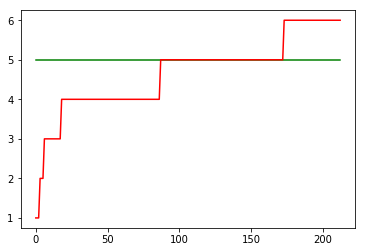

In [500]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

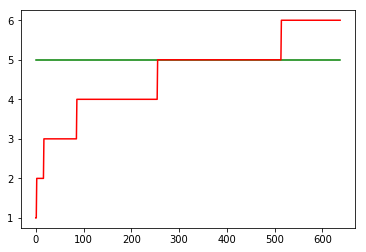

In [501]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [502]:
param_space = {
    'hidden_layer_sizes': [(5,), (5, 2, 5), (2, 5, 2), (2, 50, 2), (2, 100, 2), (10, 50, 10)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [503]:
classifier = MLPClassifier(random_state=42)

grid_search = GridSearchCV(classifier, param_grid=param_space, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error',\
                           verbose=42)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.8286604361370716, total=   0.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.889589905362776, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.8286604361370716, total=   0.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.889589905362776, total=   0.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.838006230529595, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.8548895899053628, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.838006230529595, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.8548895899053628, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.7694704049844237, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.7694704049844237, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    3.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.8068535825545171, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.8422712933753943, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.8068535825545171, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.8422712933753943, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.8940809968847352, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    5.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.9400630914826499, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    5.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.8940809968847352, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.6s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.9400630914826499, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.8193146417445483, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    5.9s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.8927444794952681, total=   0.0s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.8193146417445483, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    6.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.8927444794952681, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    6.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.838006230529595, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.8548895899053628, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    6.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.838006230529595, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    7.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.8548895899053628, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    7.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    7.6s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.9400630914826499, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    7.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    8.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.9400630914826499, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    8.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.7725856697819314, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    8.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    8.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.7725856697819314, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    8.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    9.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.8068535825545171, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.8422712933753943, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.8068535825545171, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.8422712933753943, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.8878504672897196, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.9400630914826499, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.8878504672897196, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.9400630914826499, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.8193146417445483, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.7697160883280757, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.8193146417445483, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.7697160883280757, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.9595015576323987, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.9589905362776026, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.9595015576323987, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.9589905362776026, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.7632398753894081, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.7632398753894081, total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.7632398753894081, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.7632398753894081, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.8193146417445483, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.7634069400630915, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.8193146417445483, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.7634069400630915, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.7632398753894081, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.7632398753894081, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.9595015576323987, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.9589905362776026, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.9595015576323987, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.9589905362776026, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.7632398753894081, total=   0.3s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.7632398753894081, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.7632398753894081, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.7539432176656151, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.7632398753894081, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.7539432176656151, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.9906542056074766, total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.9558359621451105, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.9906542056074766, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.9558359621451105, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.8099688473520249, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.832807570977918, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.8099688473520249, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.832807570977918, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.8411214953271028, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.8927444794952681, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.8411214953271028, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.8927444794952681, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.8722741433021807, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.7981072555205048, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.8722741433021807, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.7981072555205048, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.8255451713395638, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.861198738170347, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.8255451713395638, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.861198738170347, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.9439252336448598, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.9305993690851735, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.9439252336448598, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.9305993690851735, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.9906542056074766, total=   0.0s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-0.9495268138801262, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.9906542056074766, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-0.9495268138801262, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.8099688473520249, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-0.8264984227129337, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.8099688473520249, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-0.8264984227129337, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.8411214953271028, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-0.8927444794952681, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.8411214953271028, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-0.8927444794952681, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.8722741433021807, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-0.804416403785489, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.8722741433021807, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-0.804416403785489, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.822429906542056, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-0.8517350157728707, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.822429906542056, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-0.8517350157728707, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.9439252336448598, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-0.9305993690851735, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.9439252336448598, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   35.2s finished


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-0.9305993690851735, total=   0.2s


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(5,), (5, 2, 5), (2, 5, 2), (2, 50, 2), (2, 100, 2), (10, 50, 10)], 'activation': ['relu', 'logistic', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=42)

In [504]:
y_pred_train = grid_search.predict(X_train)

In [505]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [506]:
confusion_mtrx

array([[  0,   0,   0,   0,   2,   0],
       [  0,   0,   0,   0,  15,   0],
       [  0,   0,   0,   0,  69,   0],
       [  0,   0,   0,   0, 169,   0],
       [  0,   0,   0,   0, 259,   0],
       [  0,   0,   0,   0, 124,   0]], dtype=int64)

In [507]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [508]:
print(accuracy, mae, rmse)

0.4059561128526646 0.7586206896551724 1.1536050156739812


In [509]:
y_pred = grid_search.predict(X_test)

In [510]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [511]:
confusion_mtrx

array([[ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0, 69,  0],
       [ 0,  0,  0,  0, 86,  0],
       [ 0,  0,  0,  0, 40,  0]], dtype=int64)

In [512]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [513]:
print(accuracy, mae, rmse)

0.40375586854460094 0.7230046948356808 1.0892018779342723


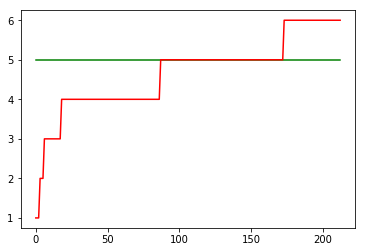

In [514]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

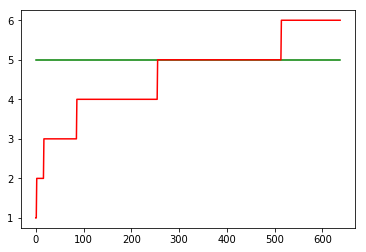

In [515]:
y_pred = grid_search.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [516]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (2, 5, 2),
 'learning_rate': 'constant',
 'solver': 'adam'}

# Liking

In [517]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -2].values

In [518]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [519]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [520]:
classifier = MLPClassifier(hidden_layer_sizes=(2, 50, 2), random_state=0)
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 50, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [521]:
y_pred_train = classifier.predict(X_train)

In [522]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [523]:
confusion_mtrx

array([[  0,   0,   1,   0,   3,  15,   0],
       [  0,   0,   1,   0,   2,  43,   0],
       [  0,   0,   8,   0,   2,  90,   0],
       [  0,   0,   7,   0,   7, 103,   0],
       [  0,   0,   4,   0,  14, 107,   0],
       [  0,   0,   3,   0,   5, 167,   0],
       [  0,   0,   3,   0,   2,  51,   0]], dtype=int64)

In [524]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [525]:
print(accuracy, mae, rmse)

0.2962382445141066 1.5015673981191222 4.137931034482759


In [526]:
y_pred = classifier.predict(X_test)

In [527]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [528]:
confusion_mtrx

array([[ 0,  0,  1,  0,  0,  8,  0],
       [ 0,  0,  1,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  3, 33,  0],
       [ 0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  3,  0,  3, 26,  0],
       [ 0,  0,  0,  0,  4, 47,  0],
       [ 0,  0,  1,  0,  3, 22,  0]], dtype=int64)

In [529]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [530]:
print(accuracy, mae, rmse)

0.2347417840375587 1.7183098591549295 4.892018779342723


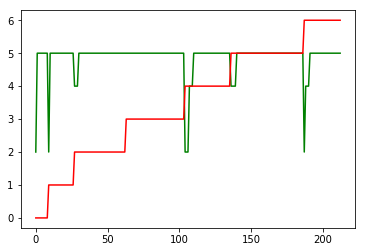

In [531]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

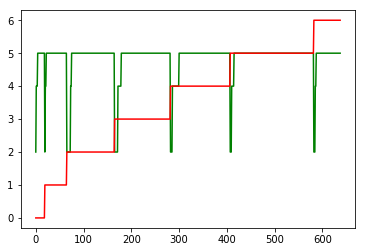

In [532]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [533]:
param_space = {
    'hidden_layer_sizes': [(5,), (5, 2, 5), (2, 5, 2), (2, 50, 2), (2, 100, 2), (10, 50, 10)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [534]:
classifier = MLPClassifier(random_state=42)

grid_search = GridSearchCV(classifier, param_grid=param_space, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error',\
                           verbose=42)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.4205607476635513, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.473186119873817, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.4205607476635513, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.473186119873817, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.4797507788161994, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.5110410094637223, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.4797507788161994, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.5110410094637223, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.5233644859813085, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.5299684542586751, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.1s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.5233644859813085, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.5299684542586751, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.5482866043613708, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.5457413249211356, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.5482866043613708, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    3.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.5457413249211356, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.6822429906542056, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.5331230283911672, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.6822429906542056, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.5331230283911672, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.6292834890965733, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    5.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.4952681388012619, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    5.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.6292834890965733, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.7s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.4952681388012619, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.4205607476635513, total=   0.0s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    6.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.4700315457413249, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.4205607476635513, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    6.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.4700315457413249, total=   0.0s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    6.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.4641744548286604, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.4858044164037856, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    7.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.4641744548286604, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    7.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.4858044164037856, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    7.5s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.4797507788161994, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    7.7s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.4858044164037856, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    7.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.4797507788161994, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    8.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.4858044164037856, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    8.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.573208722741433, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    8.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.5299684542586751, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    8.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.573208722741433, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    9.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.5299684542586751, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    9.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.6292834890965733, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.526813880126183, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.6292834890965733, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.526813880126183, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.6261682242990654, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.5173501577287065, total=   0.3s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.6261682242990654, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.5173501577287065, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.4080996884735202, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.4700315457413249, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.4080996884735202, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.4700315457413249, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.560747663551402, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.555205047318612, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.560747663551402, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptiv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.560747663551402, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.555205047318612, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.560747663551402, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.555205047318612, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.560747663551402, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.555205047318612, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.560747663551402, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.555205047318612, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.560747663551402, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.555205047318612, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.560747663551402, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.555205047318612, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.4953271028037383, total=   0.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.5678233438485805, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.4953271028037383, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.5678233438485805, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.411214953271028, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.4700315457413249, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.411214953271028, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.4700315457413249, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.560747663551402, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.555205047318612, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.560747663551402, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.560747663551402, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.555205047318612, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.560747663551402, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.555205047318612, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.560747663551402, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.555205047318612, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.560747663551402, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.555205047318612, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.560747663551402, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.555205047318612, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.560747663551402, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.555205047318612, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.560747663551402, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.555205047318612, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.560747663551402, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.5615141955835963, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.5825545171339563, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.5615141955835963, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.4174454828660437, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.5520504731861198, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.4174454828660437, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.5520504731861198, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.4610591900311527, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.5047318611987381, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.4610591900311527, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.5047318611987381, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.308411214953271, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.3974763406940063, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.308411214953271, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.3974763406940063, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.3489096573208723, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.6561514195583595, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.3489096573208723, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.6561514195583595, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.5046728971962617, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.6182965299684542, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.5046728971962617, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.6182965299684542, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.5763239875389408, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.5362776025236593, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.5763239875389408, total=   0.0s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.5362776025236593, total=   0.0s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.4080996884735202, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.5615141955835963, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.4080996884735202, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.5615141955835963, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.4610591900311527, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.5047318611987381, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.4610591900311527, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.5047318611987381, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.308411214953271, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.4006309148264984, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.308411214953271, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.4006309148264984, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.3613707165109035, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.6277602523659307, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.3613707165109035, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.6277602523659307, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.5015576323987538, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.6214511041009463, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.5015576323987538, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   33.5s finished


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.6214511041009463, total=   0.2s


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(5,), (5, 2, 5), (2, 5, 2), (2, 50, 2), (2, 100, 2), (10, 50, 10)], 'activation': ['relu', 'logistic', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=42)

In [535]:
y_pred_train = grid_search.predict(X_train)

In [536]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [537]:
confusion_mtrx

array([[  0,   0,   0,   0,   7,  12,   0],
       [  0,   0,   0,   0,  15,  31,   0],
       [  0,   0,   0,   0,  43,  57,   0],
       [  0,   0,   0,   0,  69,  48,   0],
       [  0,   0,   0,   0,  66,  59,   0],
       [  0,   0,   0,   0,  69, 106,   0],
       [  0,   0,   0,   0,  21,  35,   0]], dtype=int64)

In [538]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [539]:
print(accuracy, mae, rmse)

0.26959247648902823 1.3855799373040751 3.5047021943573666


In [540]:
y_pred = grid_search.predict(X_test)

In [541]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [542]:
confusion_mtrx

array([[ 0,  0,  0,  0,  5,  4,  0],
       [ 0,  0,  0,  0,  8, 10,  0],
       [ 0,  0,  0,  0, 22, 14,  0],
       [ 0,  0,  0,  0, 18, 23,  0],
       [ 0,  0,  0,  0, 15, 17,  0],
       [ 0,  0,  0,  0, 24, 27,  0],
       [ 0,  0,  0,  0, 16, 10,  0]], dtype=int64)

In [543]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [544]:
print(accuracy, mae, rmse)

0.19718309859154928 1.5821596244131455 3.995305164319249


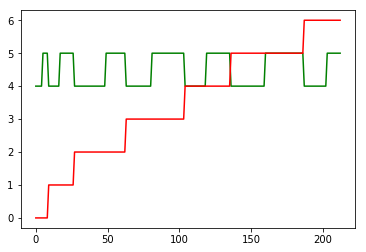

In [545]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

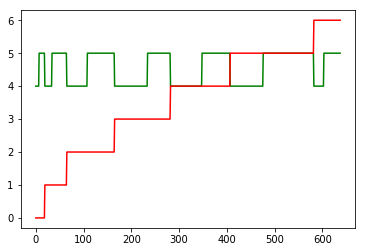

In [546]:
y_pred = grid_search.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [547]:
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (2, 50, 2),
 'learning_rate': 'constant',
 'solver': 'adam'}

# Valence

In [548]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -1].values

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [550]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [551]:
classifier = MLPClassifier(hidden_layer_sizes=(2, 50, 2), random_state=0)
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 50, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [552]:
y_pred_train = classifier.predict(X_train)

In [553]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [554]:
confusion_mtrx

array([[293,   0,   0,  14,   0],
       [ 64,   0,   0,   8,   0],
       [ 58,   0,   0,  15,   0],
       [ 70,   0,   0,  26,   0],
       [ 74,   0,   0,  16,   0]], dtype=int64)

In [555]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [556]:
print(accuracy, mae, rmse)

0.5 1.2147335423197492 3.603448275862069


In [557]:
y_pred = classifier.predict(X_test)

In [558]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [559]:
confusion_mtrx

array([[89,  0,  0, 10,  0],
       [34,  0,  0,  1,  0],
       [15,  0,  0,  7,  0],
       [24,  0,  0,  5,  0],
       [24,  0,  0,  4,  0]], dtype=int64)

In [560]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [561]:
print(accuracy, mae, rmse)

0.4413145539906103 1.2910798122065728 3.751173708920188


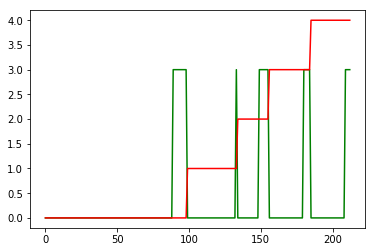

In [562]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

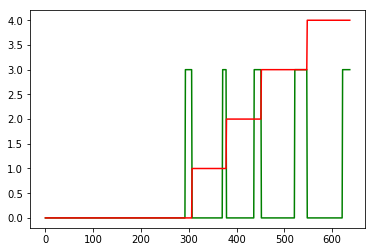

In [563]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [564]:
param_space = {
    'hidden_layer_sizes': [(5,), (5, 2, 5), (2, 5, 2), (2, 50, 2), (2, 100, 2), (10, 50, 10)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [565]:
classifier = MLPClassifier(random_state=42)

grid_search = GridSearchCV(classifier, param_grid=param_space, cv=StratifiedKFold(2), scoring='neg_mean_absolute_error',\
                           verbose=42)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.346875, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.4622641509433962, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.346875, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.4622641509433962, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.3875, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.421383647798742, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.3875, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.421383647798742, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.6s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.2s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.55, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.55, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    3.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.628125, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    5.0s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.5031446540880504, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    5.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.628125, total=   0.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.6s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.5031446540880504, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.3625, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    6.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.4622641509433962, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.3625, total=   0.0s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    6.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.4622641509433962, total=   0.0s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    6.5s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.39375, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.430817610062893, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    6.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.39375, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    7.1s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.430817610062893, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    7.3s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    7.5s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    7.7s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    7.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.5375, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    8.2s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    8.4s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    8.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.5375, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    8.9s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    9.2s remaining:    0.0s


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.575, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.4779874213836477, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.575, total=   0.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.4779874213836477, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.346875, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.371069182389937, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.346875, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.371069182389937, total=   0.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 
[CV]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adapti

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.35, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.371069182389937, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.35, total=   0.0s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.371069182389937, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.2s
[CV] activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.45, total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.578616352201258, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.45, total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.578616352201258, total=   0.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.6375, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.4088050314465408, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.6375, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.4088050314465408, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.571875, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.5849056603773586, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.571875, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.5849056603773586, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.39375, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.4622641509433962, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.39375, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.4622641509433962, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.5625, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.5849056603773586, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.5625, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.5849056603773586, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.45, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=constant, solver=adam, score=-1.5660377358490567, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.45, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5,), learning_rate=adaptive, solver=adam, score=-1.5660377358490567, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.63125, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=constant, solver=adam, score=-1.39937106918239, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.63125, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(5, 2, 5), learning_rate=adaptive, solver=adam, score=-1.39937106918239, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=constant, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.35625, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 5, 2), learning_rate=adaptive, solver=adam, score=-1.3584905660377358, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.571875, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=constant, solver=adam, score=-1.559748427672956, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.571875, total=   0.1s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 50, 2), learning_rate=adaptive, solver=adam, score=-1.559748427672956, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.40625, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=constant, solver=adam, score=-1.471698113207547, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.40625, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(2, 100, 2), learning_rate=adaptive, solver=adam, score=-1.471698113207547, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.56875, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=constant, solver=adam, score=-1.6069182389937107, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.56875, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   33.1s finished


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 50, 10), learning_rate=adaptive, solver=adam, score=-1.6069182389937107, total=   0.2s


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(5,), (5, 2, 5), (2, 5, 2), (2, 50, 2), (2, 100, 2), (10, 50, 10)], 'activation': ['relu', 'logistic', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=42)

In [566]:
y_pred_train = grid_search.predict(X_train)

In [567]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [568]:
confusion_mtrx

array([[307,   0,   0,   0,   0],
       [ 72,   0,   0,   0,   0],
       [ 73,   0,   0,   0,   0],
       [ 96,   0,   0,   0,   0],
       [ 90,   0,   0,   0,   0]], dtype=int64)

In [569]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [570]:
print(accuracy, mae, rmse)

0.48119122257053293 1.3573667711598747 4.181818181818182


In [571]:
y_pred = grid_search.predict(X_test)

In [572]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [573]:
confusion_mtrx

array([[99,  0,  0,  0,  0],
       [35,  0,  0,  0,  0],
       [22,  0,  0,  0,  0],
       [29,  0,  0,  0,  0],
       [28,  0,  0,  0,  0]], dtype=int64)

In [574]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [575]:
print(accuracy, mae, rmse)

0.4647887323943662 1.3051643192488263 3.9061032863849765


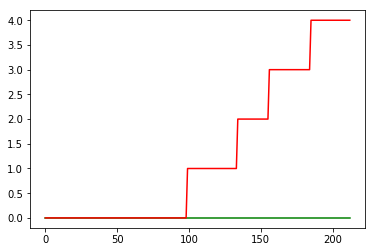

In [576]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

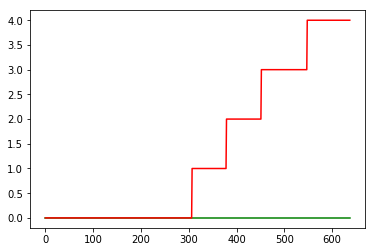

In [577]:
y_pred = grid_search.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [578]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (2, 5, 2),
 'learning_rate': 'constant',
 'solver': 'adam'}